In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn import metrics
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [150]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [151]:
train_df.head()

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,...,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,...,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,...,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0
2,2,32,3,158,8.5,7.4,9.1,24.1,0.83,95,...,Male,Hispanic,Highschool,Lower-Middle,Never,Retired,0,0,0,0.0
3,3,54,3,77,4.6,7.0,9.2,26.6,0.83,121,...,Female,White,Highschool,Lower-Middle,Current,Employed,0,1,0,1.0
4,4,54,1,55,5.7,6.2,5.1,28.8,0.90,108,...,Male,White,Highschool,Upper-Middle,Never,Retired,0,1,0,1.0


In [152]:
train_df_numbers=['bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol'	,'ldl_cholesterol',	'triglycerides']
train_df_strings=['gender','ethnicity',	'education_level',	'income_level',	'smoking_status',	'employment_status']

<Axes: >

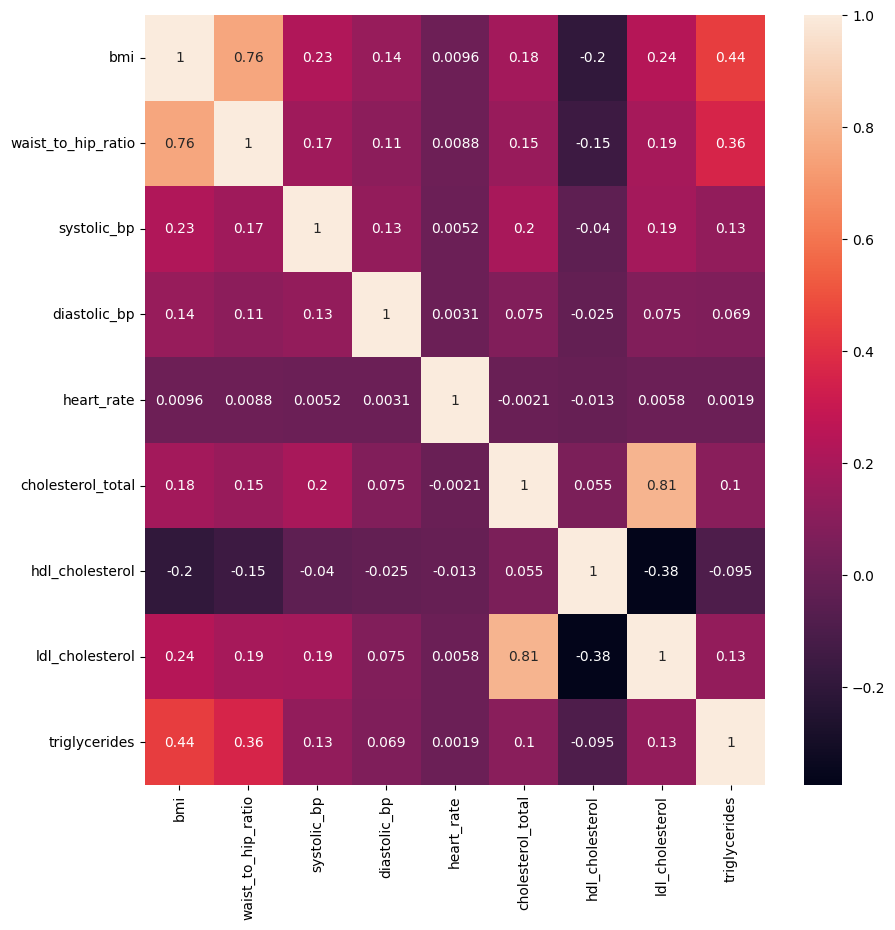

In [153]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df[train_df_numbers].corr(), annot=True)


In [154]:
train_df=train_df.drop(['waist_to_hip_ratio', 'ldl_cholesterol'], axis=1)
train_df_numbers=list(set(train_df_numbers)-set(['waist_to_hip_ratio', 'ldl_cholesterol']))
test_df=test_df.drop(['waist_to_hip_ratio', 'ldl_cholesterol'], axis=1)

<Axes: >

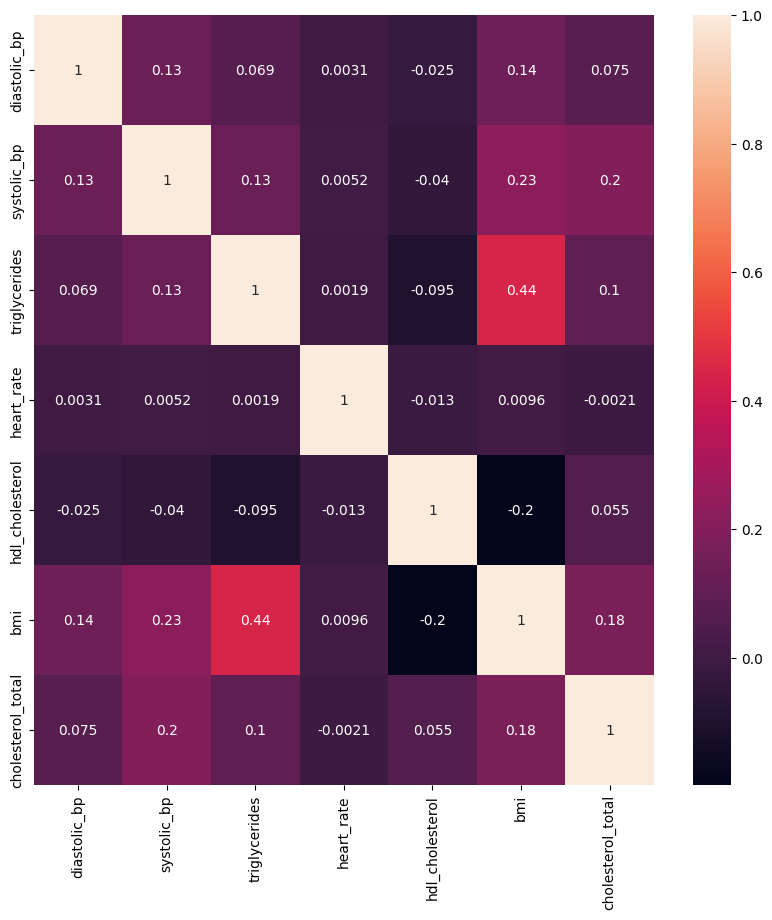

In [155]:
plt.figure(figsize=(10, 10))
sns.heatmap(train_df[train_df_numbers].corr(), annot=True)


In [156]:
norm_encoder=OneHotEncoder(handle_unknown='ignore', sparse_output=False)
string_transformer=Pipeline([('oneHotEncoding', norm_encoder)])

In [157]:
from clipper import iqr_clipper


number_transformer=Pipeline([
    ('iqr_clipper', iqr_clipper(train_df_numbers)),
    ('feature_scaling', StandardScaler()),
     ])

In [158]:
preprocessing=ColumnTransformer([
    ('number_transformer', number_transformer, train_df_numbers),
    ('string_transformer', string_transformer, train_df_strings),
],remainder="drop" )

In [159]:
pipeline=Pipeline([
    ('preprocessing', preprocessing),
    ('logisticRegression', LogisticRegression())
])

In [160]:
id=test_df['id']
test_df=test_df.drop('id', axis=1)
X_train=train_df.drop(['diagnosed_diabetes', 'id'], axis=1)
y_train=train_df['diagnosed_diabetes']

In [161]:
pipeline.fit(X_train, y_train)
final_test=pipeline.predict(test_df)
final_test

array([1., 1., 1., ..., 1., 1., 1.], shape=(300000,))

In [162]:
# result=pd.DataFrame(final_test, columns=['diagnosed_diabetes'] )
# result=pd.concat([id, result], axis=1)
# result.head()

In [163]:
# result.to_csv('result.csv', index=False)

In [164]:
joblib.dump(pipeline, 'diabeto_LR.joblib')

['diabeto_LR.joblib']